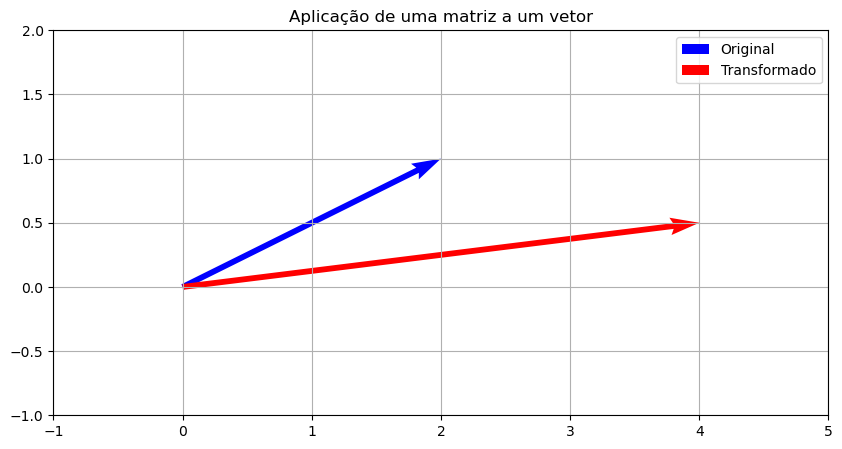

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vetor original
v = np.array([2, 1])

# Matriz de transformação (exemplo: escala 2x em x e 0.5x em y)
A = np.array([[2, 0],
              [0, 0.5]])

# Aplicando a transformação
v_transformed = A @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='r', label='Transformado')
plt.xlim(-1, 5)
plt.ylim(-1, 2)
plt.grid()
plt.legend()
plt.title('Aplicação de uma matriz a um vetor')
plt.show()

## 2. Rotação
Uma matriz de rotação gira vetores por um ângulo θ enquanto preserva seu comprimento.

A matriz de rotação 2D é:

[ cosθ  -sinθ ]    
[ sinθ   cosθ ]

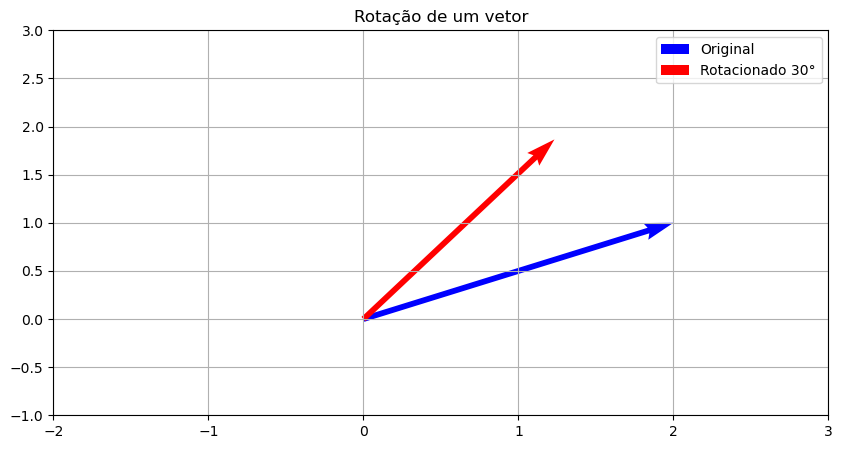

In [2]:
def rotation_matrix(theta):
    theta_rad = np.radians(theta)
    return np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad)]
    ])

# Ângulo de rotação
angle = 30

# Aplicando rotação
R = rotation_matrix(angle)
v_rotated = R @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_rotated[0], v_rotated[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Rotacionado {angle}°')
plt.xlim(-2, 3)
plt.ylim(-1, 3)
plt.grid()
plt.legend()
plt.title('Rotação de um vetor')
plt.show()

## 3. Escala (Dilatação/Contração)
A escala altera o tamanho do vetor ao longo dos eixos:

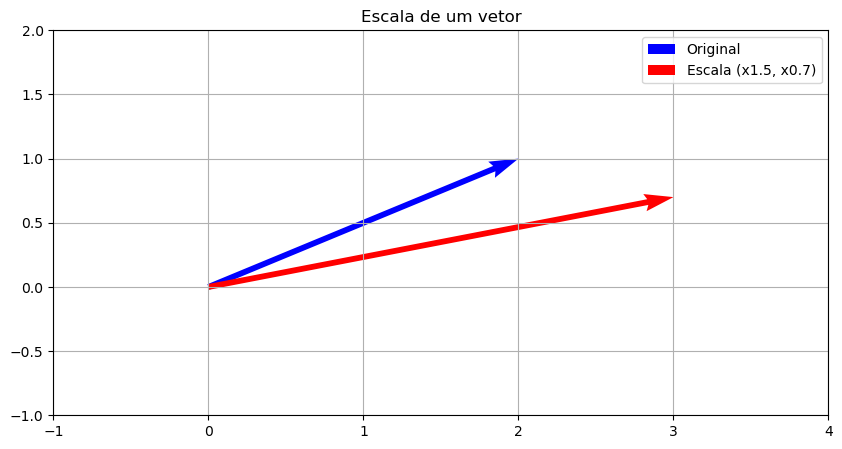

In [3]:
# Fatores de escala
sx, sy = 1.5, 0.7

# Matriz de escala
S = np.array([
    [sx, 0],
    [0, sy]
])

# Aplicando escala
v_scaled = S @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_scaled[0], v_scaled[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Escala (x{sx}, x{sy})')
plt.xlim(-1, 4)
plt.ylim(-1, 2)
plt.grid()
plt.legend()
plt.title('Escala de um vetor')
plt.show()

## 4. Reflexão
A reflexão inverte o vetor em relação a uma linha (eixo ou outra):

Reflexão sobre o eixo x:

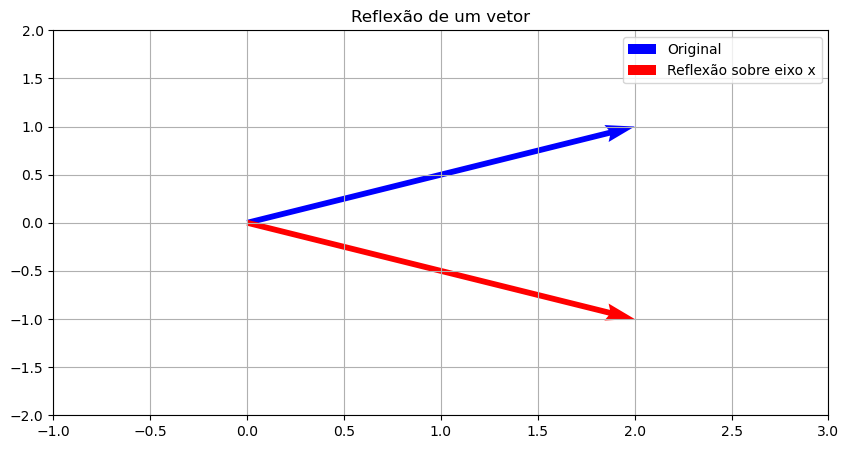

In [4]:
F_x = np.array([
    [1, 0],
    [0, -1]
])

v_reflected_x = F_x @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_reflected_x[0], v_reflected_x[1], angles='xy', scale_units='xy', scale=1, color='r', label='Reflexão sobre eixo x')
plt.xlim(-1, 3)
plt.ylim(-2, 2)
plt.grid()
plt.legend()
plt.title('Reflexão de um vetor')
plt.show()

### Reflexão sobre a linha y = x:

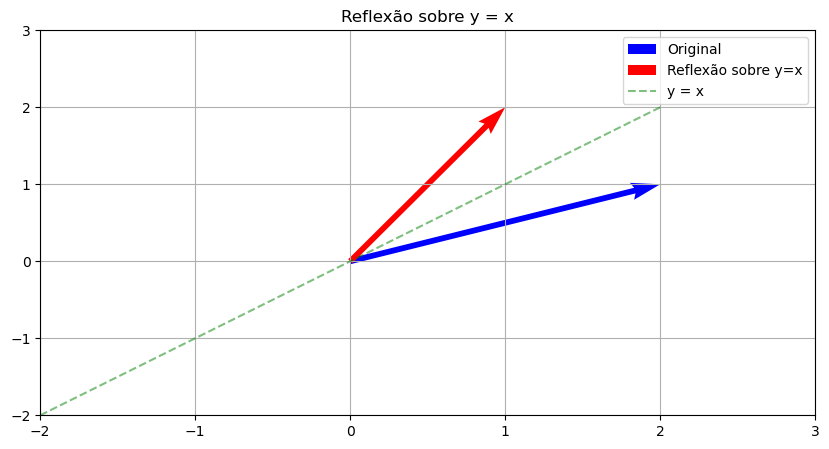

In [5]:
F_xy = np.array([
    [0, 1],
    [1, 0]
])

v_reflected_xy = F_xy @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_reflected_xy[0], v_reflected_xy[1], angles='xy', scale_units='xy', scale=1, color='r', label='Reflexão sobre y=x')
plt.plot([-2, 2], [-2, 2], 'g--', alpha=0.5, label='y = x')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.grid()
plt.legend()
plt.title('Reflexão sobre y = x')
plt.show()

## Visualização Combinada
Podemos visualizar várias transformações aplicadas a um conjunto de vetores:

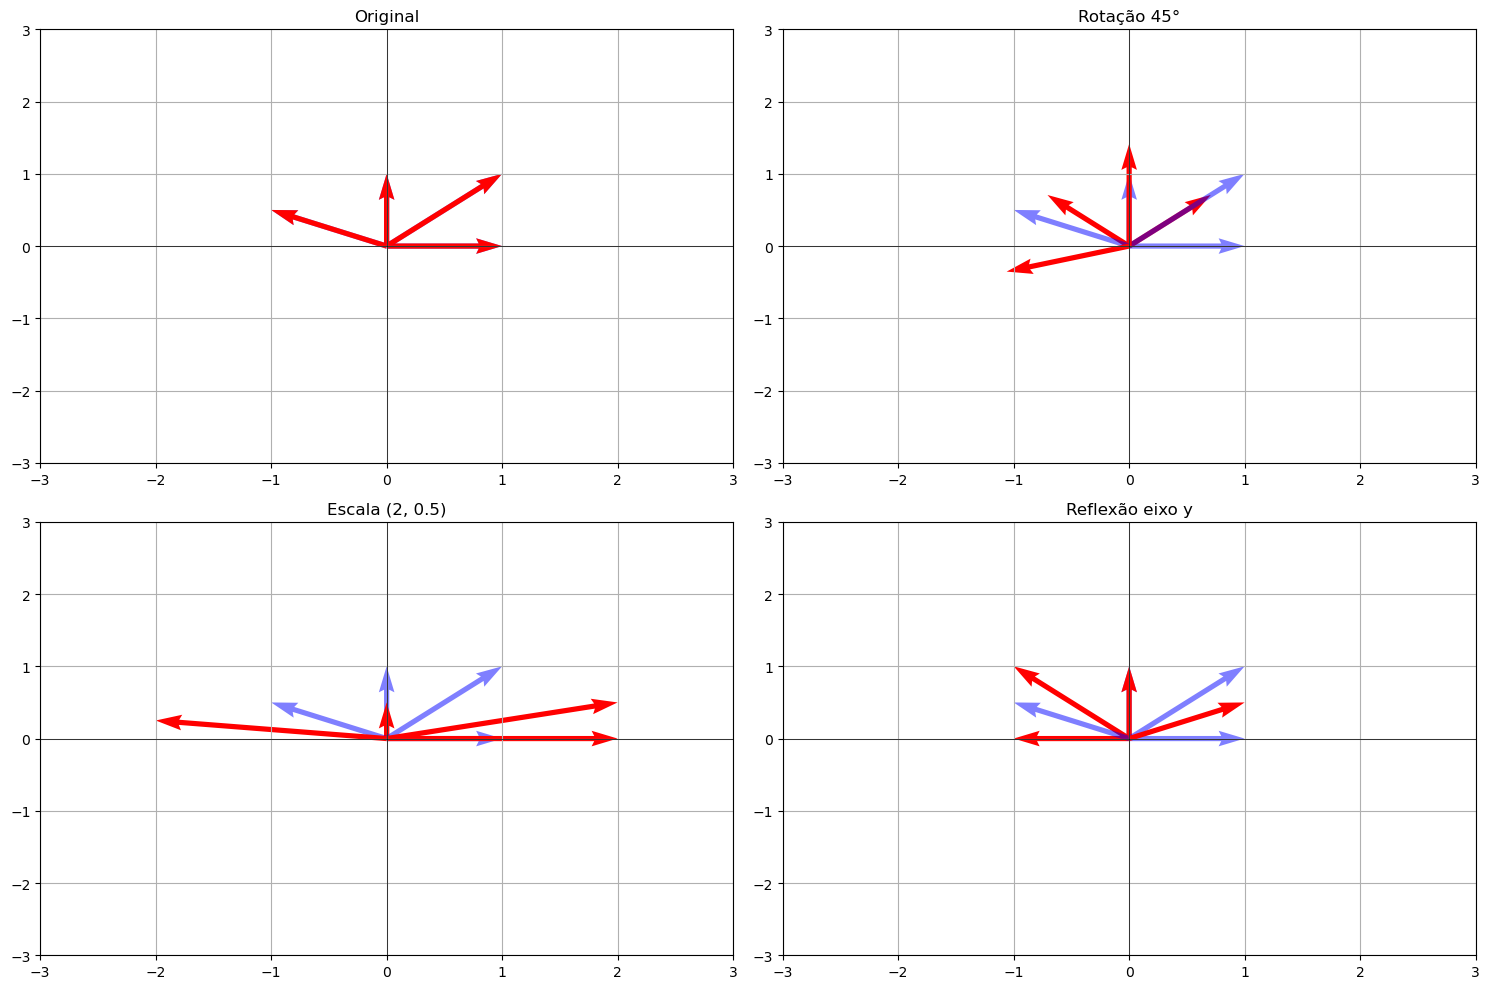

In [6]:
# Criando um conjunto de vetores
vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])

# Definindo transformações
transformations = {
    'Original': np.eye(2),
    'Rotação 45°': rotation_matrix(45),
    'Escala (2, 0.5)': np.array([[2, 0], [0, 0.5]]),
    'Reflexão eixo y': np.array([[-1, 0], [0, 1]])
}

# Plotando
plt.figure(figsize=(15, 10))
for i, (title, T) in enumerate(transformations.items(), 1):
    plt.subplot(2, 2, i)
    for v in vectors:
        v_t = T @ v
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
        plt.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    plt.title(title)
    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

## Propriedades Importantes
Preservação de operações: T(u + v) = T(u) + T(v) e T(cv) = cT(v)

Origem fixa: T(0) = 0

Composição: A aplicação sucessiva de transformações equivale à multiplicação de suas matrizes

Estas visualizações ajudam a entender geometricamente como as matrizes transformam o espaço vetorial. Experimente modificar os parâmetros para ver como diferentes transformações afetam os vetores!

## Cisalhamento (Shear) em Transformações Lineares
Você está absolutamente certo! Vou completar a explicação com o cisalhamento, que é uma transformação linear importante que desliza o espaço ao longo de um eixo.

### 5. Cisalhamento (Shear)
O cisalhamento é uma transformação que desloca pontos em uma direção proporcional à sua coordenada em outra direção. Existem dois tipos principais:

a) Cisalhamento horizontal (ao longo do eixo x)
A matriz de cisalhamento horizontal é:

[ 1  k ]   
[ 0  1 ]

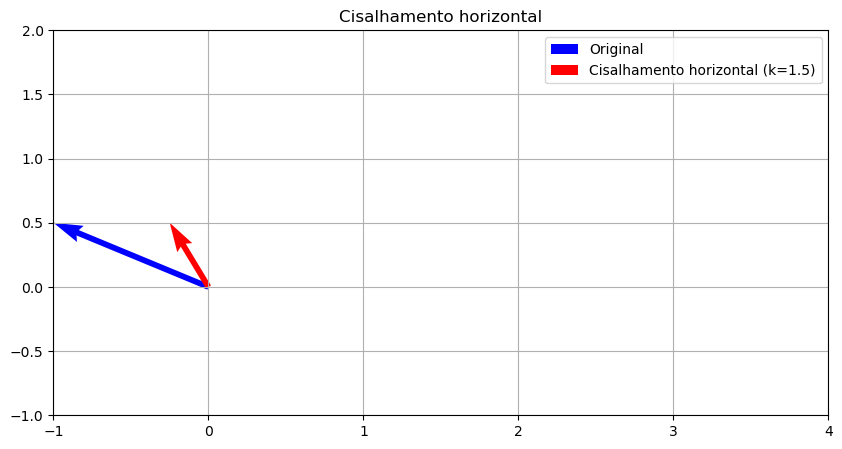

In [7]:
def horizontal_shear_matrix(k):
    return np.array([
        [1, k],
        [0, 1]
    ])

# Fator de cisalhamento
k = 1.5

# Aplicando cisalhamento horizontal
Sh = horizontal_shear_matrix(k)
v_sheared_h = Sh @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_sheared_h[0], v_sheared_h[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Cisalhamento horizontal (k={k})')
plt.xlim(-1, 4)
plt.ylim(-1, 2)
plt.grid()
plt.legend()
plt.title('Cisalhamento horizontal')
plt.show()

## b) Cisalhamento vertical (ao longo do eixo y)
A matriz de cisalhamento vertical é:

[ 1  0 ]   
[ k  1 ]

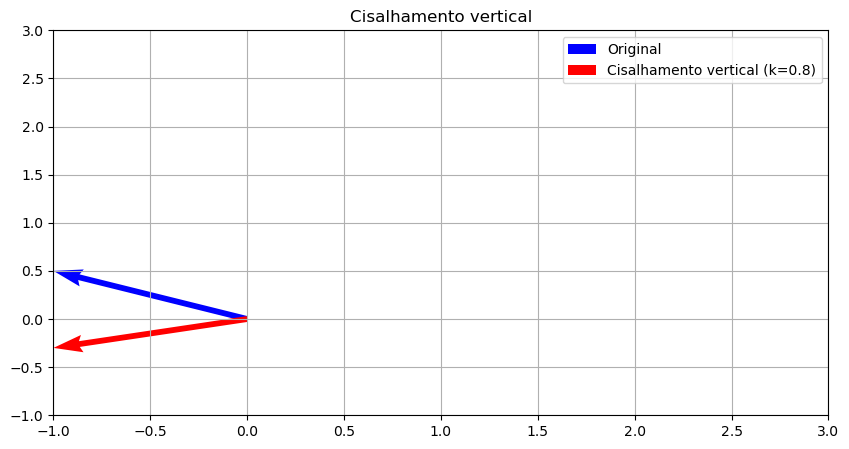

In [8]:
def vertical_shear_matrix(k):
    return np.array([
        [1, 0],
        [k, 1]
    ])

# Fator de cisalhamento
k = 0.8

# Aplicando cisalhamento vertical
Sv = vertical_shear_matrix(k)
v_sheared_v = Sv @ v

# Plotando
plt.figure(figsize=(10, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original')
plt.quiver(0, 0, v_sheared_v[0], v_sheared_v[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Cisalhamento vertical (k={k})')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.legend()
plt.title('Cisalhamento vertical')
plt.show()

## Visualização Combinada com Cisalhamento
Vamos incluir o cisalhamento na visualização combinada:

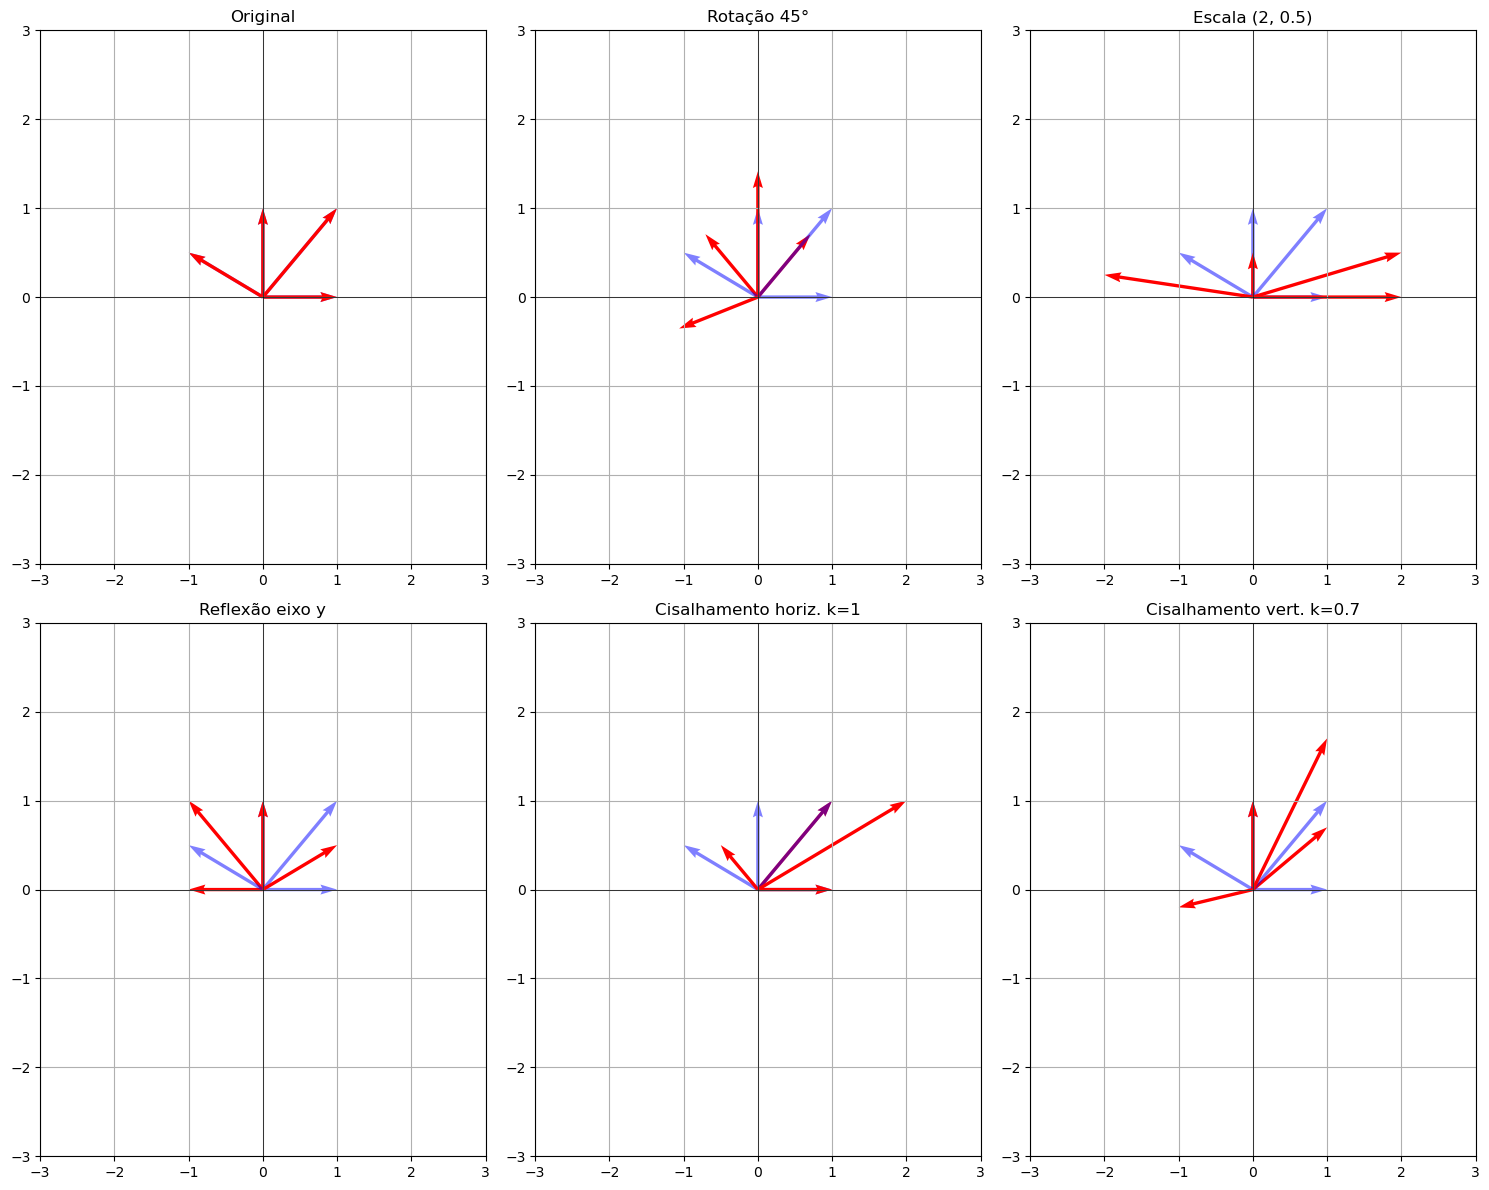

In [9]:
# Criando um conjunto de vetores
vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])

# Adicionando cisalhamento às transformações
transformations = {
    'Original': np.eye(2),
    'Rotação 45°': rotation_matrix(45),
    'Escala (2, 0.5)': np.array([[2, 0], [0, 0.5]]),
    'Reflexão eixo y': np.array([[-1, 0], [0, 1]]),
    'Cisalhamento horiz. k=1': horizontal_shear_matrix(1),
    'Cisalhamento vert. k=0.7': vertical_shear_matrix(0.7)
}

# Plotando
plt.figure(figsize=(15, 12))
for i, (title, T) in enumerate(transformations.items(), 1):
    plt.subplot(2, 3, i)
    for v in vectors:
        v_t = T @ v
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
        plt.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    plt.title(title)
    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

## Efeito Geométrico do Cisalhamento
O cisalhamento pode ser entendido como:

Horizontal: Pontos se movem horizontalmente proporcional à sua coordenada y

Vertical: Pontos se movem verticalmente proporcional à sua coordenada x

Para visualizar melhor, vamos aplicar o cisalhamento a um quadrado:

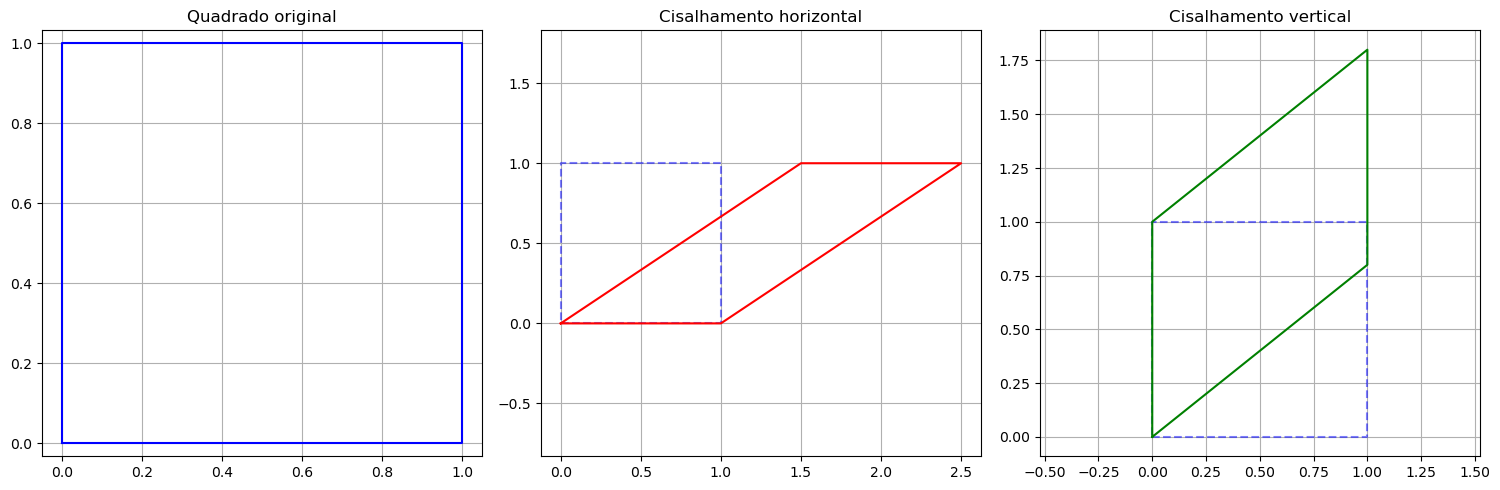

In [10]:
# Definindo os vértices de um quadrado
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Cisalhamento horizontal
k = 1.5
Sh = horizontal_shear_matrix(k)
sheared_square_h = (Sh @ square.T).T

# Cisalhamento vertical
k = 0.8
Sv = vertical_shear_matrix(k)
sheared_square_v = (Sv @ square.T).T

# Plotando
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(square[:,0], square[:,1], 'b-', label='Original')
plt.xlim(-1, 3)
plt.ylim(-1, 2)
plt.grid()
plt.title('Quadrado original')
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.plot(square[:,0], square[:,1], 'b--', alpha=0.5)
plt.plot(sheared_square_h[:,0], sheared_square_h[:,1], 'r-', label=f'Cisalhamento horiz. k={k}')
plt.xlim(-1, 3)
plt.ylim(-1, 2)
plt.grid()
plt.title('Cisalhamento horizontal')
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.plot(square[:,0], square[:,1], 'b--', alpha=0.5)
plt.plot(sheared_square_v[:,0], sheared_square_v[:,1], 'g-', label=f'Cisalhamento vert. k={k}')
plt.xlim(-1, 2)
plt.ylim(-1, 3)
plt.grid()
plt.title('Cisalhamento vertical')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Propriedades do Cisalhamento
Preserva área: O determinante da matriz de cisalhamento é sempre 1, logo a área é preservada

Não preserva ângulos: Retas perpendiculares deixam de sê-lo após o cisalhamento

Não é uma rotação: Embora distorça a forma, não é equivalente a uma rotação

O cisalhamento é muito utilizado em computação gráfica, processamento de imagens e física (para descrever deformações em materiais).